# Poèmes humains et poèmes générés par ChatGPT : une analyse comparative

## 1. Analyse exploratoire 

### 1.1 Importation des poèmes 

In [2]:
# useful imports 
import pandas as pd
import glob

In [3]:
# création de deux listes de fichiers
human_poems = glob.glob('poems_humans/*.txt')
chatgpt_poems = glob.glob('poems_chatGPT/*.txt')

In [4]:
# on supprime les deux fichiers template qui ne sont pas des poèmes 
human_poems.remove('poems_humans/z_temp.txt')
chatgpt_poems.remove('poems_chatGPT/z_temp.txt')

In [5]:
df_poems = pd.DataFrame(columns=['poem_text', 'human_machine'])

In [6]:
# insertion des poèmes dans une dataframe.
for idx, poem_f in enumerate(human_poems):
    poem_lines = open(poem_f, 'r').readlines()
    poem = ""
    for verse in poem_lines:
        poem += verse
    
    df_poems.loc[idx, 'poem_text'] = poem
    # création d'une colonne "human_machine" qui spécifie si le poème vient d'un humain ou d'une machine
    df_poems.loc[idx, 'human_machine'] = 'H'

In [7]:
for idx, poem_f in enumerate(chatgpt_poems):
    poem_lines = open(poem_f, 'r').readlines()
    poem = ""
    for verse in poem_lines:
        poem += verse  
    df_poems.loc[idx +50, 'poem_text'] = poem
    df_poems.loc[idx +50, 'human_machine'] = 'M'

In [8]:
len(df_poems.index)

100

In [9]:
df_poems.sample(10)

,poem_text,human_machine
34,Quand j'étais jeune et fier et que j'ouvrais m...,H
83,"L'horizon fuit et le soleil s'éteint,\nLes omb...",M
81,"Dans l'obscurité de la nuit profonde,\nLe vent...",M
0,"Je ne viens pas ce soir vaincre ton corps, ô b...",H
46,"Nous aurons des lits pleins d'odeurs légères,\...",H
19,Tandis que les crachats rouges de la mitraille...,H
96,"Dans les cieux, les étoiles brillent en chœur,...",M
69,Je laisse mon stylo courir sur la feuille blan...,M
35,"Que l’on soit homme ou Dieu, tout génie est ma...",H
77,"Ô vieux buffet de chêne, mélancolique écrin,\n...",M


### 1.2 Pre-processing du texte 

In [10]:
df_poems_backup = df_poems.copy()

In [11]:
df_poems['reference'] = ''
df_poems.head()

,poem_text,human_machine,reference
0,"Je ne viens pas ce soir vaincre ton corps, ô b...",H,
1,gargarisme astronomique\nvibre vibre vibre vib...,H,
2,"Ô rare fleur, ô fleur de luxe et de décor,\nSu...",H,
3,Le ballon bleu de la pendule\nEt les petits ni...,H,
4,"Sur les murs des petits bourgs, des hameaux pe...",H,


In [12]:
# enlever la dernière ligne des poemes humains et la store dans une nouvelle colonne "reference" 
for idx, poem in enumerate(df_poems.poem_text):
    splt= poem.rsplit("\n", 1)
    df_poems.loc[idx, 'reference'] = splt[1]
    df_poems.loc[idx, 'poem_text'] = splt[0]

df_poems.head()

,poem_text,human_machine,reference
0,"Je ne viens pas ce soir vaincre ton corps, ô b...",H,"Stéphane Mallarmé, Angoisse"
1,gargarisme astronomique\nvibre vibre vibre vib...,H,"Tristan Tzara, Mouvement"
2,"Ô rare fleur, ô fleur de luxe et de décor,\nSu...",H,"François Coppée, Poèmes divers, 1869"
3,Le ballon bleu de la pendule\nEt les petits ni...,H,"André Breton, Titre"
4,"Sur les murs des petits bourgs, des hameaux pe...",H,"André Breton, Constellation"


In [13]:
# attribuer la valeur "chatGPT" à toutes les cellules de du subset "Machine" pour la colonne "reference"

for idx, row in df_poems.iterrows():
    if row.human_machine == 'M':
        df_poems.loc[idx, 'reference'] = 'ChatGPT'

df_poems.sample(5)


,poem_text,human_machine,reference
1,gargarisme astronomique\nvibre vibre vibre vib...,H,"Tristan Tzara, Mouvement"
80,"Aux bords d'un lac de montagne, au soleil couc...",M,ChatGPT
3,Le ballon bleu de la pendule\nEt les petits ni...,H,"André Breton, Titre"
45,"Ils me disent, tes yeux, clairs comme le crist...",H,"Charles Baudelaire, Sonnet d'automne"
72,"La belle de mes rêves, où es-tu cachée ?\nDans...",M,ChatGPT


In [14]:
df_poems.poem_text[0]

'Je ne viens pas ce soir vaincre ton corps, ô bête\nEn qui vont les péchés d’un peuple, ni creuser\nDans tes cheveux impurs une triste tempête\nSous l’incurable ennui que verse mon baiser:\n\nJe demande à ton lit le lourd sommeil sans songes\nPlanant sous les rideaux inconnus du remords,\nEt que tu peux goûter après tes noirs mensonges,\nToi qui sur le néant en sais plus que les morts:\n\nCar le Vice, rongeant ma native noblesse,\nM’a comme toi marqué de sa stérilité,\nMais tandis que ton sein de pierre est habité\n\nPar un coeur que la dent d’aucun crime ne blesse,\nJe fuis, pâle, défait, hanté par mon linceul,\nAyant peur de mourir lorsque je couche seul.\n'

Now, we want to tokenize the poem texts for further analysis.

In [15]:
import spacy
#nlp = spacy.load('en_core_web_sm')

# HAVING TROUBLE WITH SPACY : WILL COME BACK TO IT LATER

In [16]:
#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [17]:
# download the Punkt tokenizer
nltk.download('punkt')

# create a list of all poems
poems = df_poems.poem_text

# create a list of the tokenized poems 
tokenized_poems = []

# remove the \n 
for poem in poems:
    # remove newlines and convert to lowercase
    poem = poem.replace('\n', ' ').lower()
    # tokenize the poem using NLTK's Punkt tokenizer
    tokens = nltk.tokenize.word_tokenize(poem)
    # add the tokenized poem to the list
    tokenized_poems.append(tokens)
    
print(f"Poem 1 tokenized:")
print(tokenized_poems[0])

Poem 1 tokenized:
['je', 'ne', 'viens', 'pas', 'ce', 'soir', 'vaincre', 'ton', 'corps', ',', 'ô', 'bête', 'en', 'qui', 'vont', 'les', 'péchés', 'd', '’', 'un', 'peuple', ',', 'ni', 'creuser', 'dans', 'tes', 'cheveux', 'impurs', 'une', 'triste', 'tempête', 'sous', 'l', '’', 'incurable', 'ennui', 'que', 'verse', 'mon', 'baiser', ':', 'je', 'demande', 'à', 'ton', 'lit', 'le', 'lourd', 'sommeil', 'sans', 'songes', 'planant', 'sous', 'les', 'rideaux', 'inconnus', 'du', 'remords', ',', 'et', 'que', 'tu', 'peux', 'goûter', 'après', 'tes', 'noirs', 'mensonges', ',', 'toi', 'qui', 'sur', 'le', 'néant', 'en', 'sais', 'plus', 'que', 'les', 'morts', ':', 'car', 'le', 'vice', ',', 'rongeant', 'ma', 'native', 'noblesse', ',', 'm', '’', 'a', 'comme', 'toi', 'marqué', 'de', 'sa', 'stérilité', ',', 'mais', 'tandis', 'que', 'ton', 'sein', 'de', 'pierre', 'est', 'habité', 'par', 'un', 'coeur', 'que', 'la', 'dent', 'd', '’', 'aucun', 'crime', 'ne', 'blesse', ',', 'je', 'fuis', ',', 'pâle', ',', 'défait', 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/margauxleplattenier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# removal of stop words
import string

stopwords = set(nltk.corpus.stopwords.words('french'))

filtered_poems = []

for tokenized_poem in tokenized_poems:
    filtered_poem = [w for w in tokenized_poem if not w in stopwords and not w in string.punctuation and w != '’']
    filtered_poems.append(filtered_poem)

print(f"Poem 1 after stopwords removal:")
print(filtered_poems[0])

Poem 1 after stopwords removal:
['viens', 'soir', 'vaincre', 'corps', 'ô', 'bête', 'vont', 'péchés', 'peuple', 'ni', 'creuser', 'cheveux', 'impurs', 'triste', 'tempête', 'sous', 'incurable', 'ennui', 'verse', 'baiser', 'demande', 'lit', 'lourd', 'sommeil', 'sans', 'songes', 'planant', 'sous', 'rideaux', 'inconnus', 'remords', 'peux', 'goûter', 'après', 'noirs', 'mensonges', 'néant', 'sais', 'plus', 'morts', 'car', 'vice', 'rongeant', 'native', 'noblesse', 'a', 'comme', 'marqué', 'stérilité', 'tandis', 'sein', 'pierre', 'habité', 'coeur', 'dent', 'aucun', 'crime', 'blesse', 'fuis', 'pâle', 'défait', 'hanté', 'linceul', 'peur', 'mourir', 'lorsque', 'couche', 'seul']


In [ ]:
# TO DO : lemmatization ! 

### 1.3 Variabilité du vocabulaire 

Pour cette partie, nous voulons tester la variabilité du vocabulaire des poèmes de notre dataset. 
Nous allons commencer par observer la distribution générale des mots. 
Nous avons au préalable (section 1.2) enlevé les "stopwords", à savoir les mots les plus courant, au contenu sémantique très faible comme "et", "je", "est", "ai", etc.

In [19]:
# creation d'un dictionnaire pour contenir tout les mots et leur nombre d'occurrences total.
words = dict()

all_tokens = []

for tokens in filtered_poems:
    all_tokens += tokens

for token in all_tokens:
    if token not in words.keys():
        words[token] = 1
    else:
        words[token] += 1

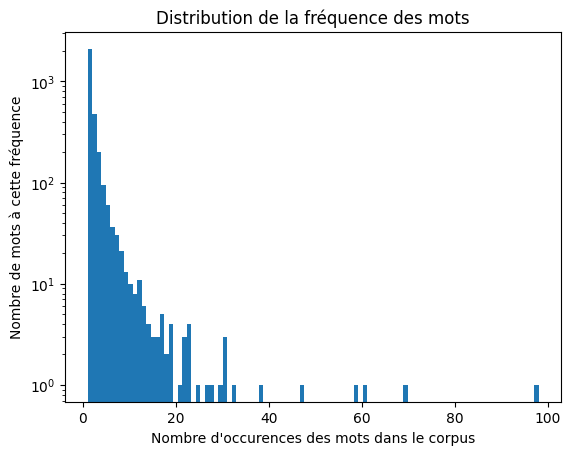

In [20]:
# visualisation de la distribution totale des mots 
import matplotlib.pyplot as plt

values = list(words.values())

plt.hist(values, bins=100)

# Add x and y axis labels and a title
plt.xlabel("Nombre d'occurences des mots dans le corpus")
plt.ylabel('Nombre de mots à cette fréquence')
plt.title('Distribution de la fréquence des mots')
plt.yscale('log')

# Show the plot
plt.show()

La distribution de la fréquence des mots semble suivre une "power law", comme attendu (insérer [ref]). En effet, quelques mots sont présent plus que 20 fois dans le corpus (queue du graphique), et la majorité n'est présente qu'une ou deux fois (tête du graphique) 

À présent, nous allons reproduire cette analyse mais en considérant séparément le corpus des poèmes humains et le corpus des poèmes artificiels

In [31]:
# les 5 premiers poemes sont les poemes humains et les 50 derniers les poèmes de chatGPT, ce qui facilite la division 
tokens_h = filtered_poems[:50]
tokens_m = filtered_poems[50:100]

words_h = dict()

all_tokens_h = []

for tokens in tokens_h:
    all_tokens_h += tokens

for token in all_tokens_h:
    if token not in words_h.keys():
        words_h[token] = 1
    else:
        words_h[token] += 1


In [35]:
words_m = dict()

all_tokens_m = []

for tokens in tokens_m:
    all_tokens_m += tokens

for token in all_tokens_m:
    if token not in words_m.keys():
        words_m[token] = 1
    else:
        words_m[token] += 1


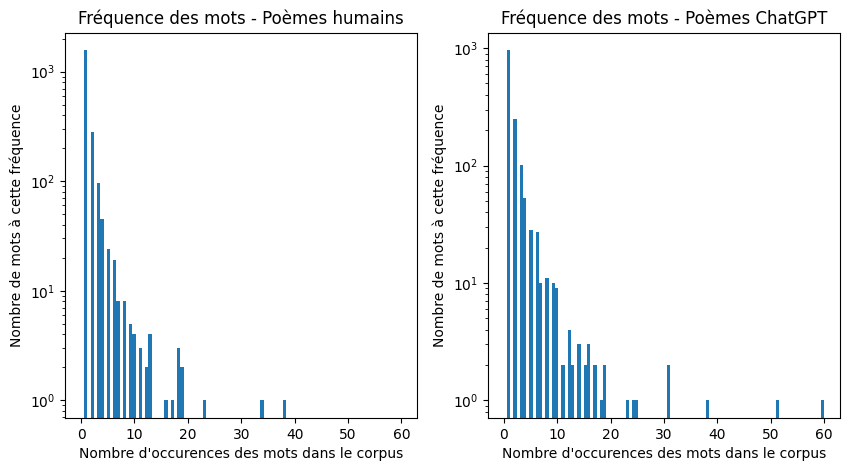

In [39]:
# visualisation de la distribution des mots : comparaison entre corpus humain et machine

# Get the values for the human poems (HP) distribution
valh = list(words_h.values())

# Get the values for the chatGPT poems (MP) distribution
valm = list(words_m.values())

# Set the same range for both distributions
range_ = (0, max(max(valh), max(valm)))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first distribution in the first subplot
ax1.hist(valh, bins=100, range=range_)
ax1.set_xlabel("Nombre d'occurences des mots dans le corpus")
ax1.set_ylabel('Nombre de mots à cette fréquence')
ax1.set_title('Fréquence des mots - Poèmes humains')
ax1.set_yscale('log')

# Plot the second distribution in the second subplot
ax2.hist(valm, bins=100, range=range_)
ax2.set_xlabel("Nombre d'occurences des mots dans le corpus")
ax2.set_ylabel('Nombre de mots à cette fréquence')
ax2.set_title('Fréquence des mots - Poèmes ChatGPT')
ax2.set_yscale('log')

# Show the plot
plt.show()

La queue du graphique des poèmes chatGPT semble plus longue. Cette différence soutiendrait notre hypothèse selon laquelle les poèmes artificielles utiliseraient plus souvent les mêmes mots, et dès lors auraient une variabilité de vocabulaire moindre.

In [ ]:
# effectuer un test statistique pour voir si cette différence est significative 

Nous allons à présent tester la variabilité du vocabulaire au sein des poèmes.

In [43]:
# la liste 'filtered_poems' contient les tokens filtrés de tous les poèmes dans l'ordre. 
# Nous allons dès lors l'ajouter comme une colonne à notre df_poems

df_poems['tokens'] = filtered_poems
df_poems.sample(5)

,poem_text,human_machine,reference,tokens
9,"Je pense à toi, Myrtho, divine enchanteresse,\...",H,"Gérard de Nerval, Myrtho","[pense, myrtho, divine, enchanteresse, pausili..."
63,"La lune argentée éclaire le jardin,\nEt le ven...",M,ChatGPT,"[lune, argentée, éclaire, jardin, vent, doux, ..."
95,"L'Amour, ce dieu puissant qui règne sur nos cœ...",M,ChatGPT,"[l'amour, dieu, puissant, règne, cœurs, a, fai..."
52,"Sur la plage de sable, je marche en solitaire\...",M,ChatGPT,"[plage, sable, marche, solitaire, bruit, vague..."
72,"La belle de mes rêves, où es-tu cachée ?\nDans...",M,ChatGPT,"[belle, rêves, où, es-tu, cachée, quel, jardin..."


In [50]:
# a présent, nous voulons compter les répétitions de ces tokens pour chaque poème. 
# Cela revient à compter combien de mots sont répétés plusieurs fois au sein du même poème.

# fonction lambda pour compter les répétitions dans une liste
count_repeats = lambda x: sum([1 for i in set(x) if x.count(i) > 1])

# Application de cette fonction lambda sur les listes de tokens
df_poems['repetitions'] = df_poems['tokens'].apply(count_repeats)

# Colonne pour indiquer le nombre de tokens par poème
df_poems['nb_tokens'] = df_poems['tokens'].apply(len)

# Ratio du nombre de répétition en fonction de la longueur du poème
calc_ratio = lambda x: x['repetitions'] / x['nb_tokens']
df_poems['ratio_rep_len'] = df_poems.apply(calc_ratio, axis=1)

df_poems.sample(5)

,poem_text,human_machine,reference,tokens,repetitions,nb_tokens,ratio_rep_len
34,Quand j'étais jeune et fier et que j'ouvrais m...,H,Et chacun de ces flots roule un peu de mon cœur.,"[quand, j'étais, jeune, fier, j'ouvrais, ailes...",9,95,0.094737
45,"Ils me disent, tes yeux, clairs comme le crist...",H,"Charles Baudelaire, Sonnet d'automne","[disent, yeux, clairs, comme, cristal, », biza...",5,73,0.068493
84,"Chère amie, ton regard clair comme l'aube,\nIl...",M,ChatGPT,"[chère, amie, regard, clair, comme, l'aube, il...",3,59,0.050847
99,"L'heure douce approche et tout devient calme,\...",M,ChatGPT,"[l'heure, douce, approche, tout, devient, calm...",3,60,0.050000
71,"L'onde, en silence, glisse sous le bateau\nEt ...",M,ChatGPT,"[l'onde, silence, glisse, sous, bateau, perdu,...",2,50,0.040000


In [56]:
# nous allons à présent comparer les valeurs de ces nouvelles colonnes
# le but est de voir si l'on observe des différences significatives entre les poèmes naturels (PN) et les poèmes artificielles (PA).

df_h = df_poems[df_poems['human_machine']=='H']
df_m = df_poems[df_poems['human_machine']=='M']

rep_stats_h = df_h['repetitions'].describe()
len_stats_h = df_h['nb_tokens'].describe()
ratio_stats_h = df_h['ratio_rep_len'].describe()

rep_stats_m = df_m['repetitions'].describe()
len_stats_m = df_m['nb_tokens'].describe()
ratio_stats_m = df_m['ratio_rep_len'].describe()

print('Mean length:')
print(f'Human poems: {len_stats_h.mean():.3f}')
print(f'Machine poems: {len_stats_m.mean():.3f}')
print('----------------------------------')
print('Mean number of repetitions:')
print(f'Human poems: {rep_stats_h.mean():.3f}')
print(f'Machine poems: {rep_stats_m.mean():.3f}')
print('----------------------------------')
print('Mean ratio (rep/len):')
print(f'Human poems: {ratio_stats_h.mean():.3f}')
print(f'Machine poems: {ratio_stats_m.mean():.3f}')


Mean length:
Human poems: 57.582
Machine poems: 56.789
----------------------------------
Mean number of repetitions:
Human poems: 11.061
Machine poems: 10.719
----------------------------------
Mean ratio (rep/len):
Human poems: 6.314
Machine poems: 6.312


Le ratio moyen entre le nombre de répétition et la longueur du poème est de 6.3 pour les PN comme pour les PA. Il n'y a donc apparemment pas de différence significative à ce niveau.

Ces brèves analyses descriptives suggèrent que la variabilité du vocabulaire au sein d'un poème serait la même pour les PN et les PA, mais qu'en général, les PA utilisent plus souvent les mêmes mots (cf. comparaison des distributions de fréquences).

Ceci pourrait-il être dû au fait que les PA génèrent plus souvent des poèmes sur les mêmes thèmes? 
--> Plus d'analyses sont requises.

## 2. Analyse thématique 

In [ ]:
# A FAIRE